# Name: Mian Afrasiyyab Farakh

# CMS: 335942

# Lab 4: Task 1: Stretching Contrast

In [3]:
import numpy as np


In [4]:
from PIL import Image

In [5]:
import matplotlib.pyplot as plt

In [68]:
img = Image.open('wiki.jpg')

In [150]:
img=img.convert('L')

In [74]:
x=np.asarray(img)

In [125]:
def stretch(rmax,rmin,smax,smin,img_array):
    z=(smax-smin)/(rmax-rmin)
    img_arr=z*(img_array-rmin)+smin
    
    return img_arr

In [141]:
y=stretch(x.max(),x.min(),255,0,x)

In [142]:
new_img=Image.fromarray(y)

In [149]:
new_img.show()

### wiki.jpg before stretching

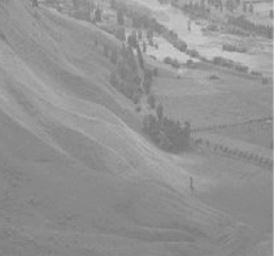

In [151]:
display(img)

In [153]:
new_img=new_img.convert('RGB')

### Wiki.jpg after stretching

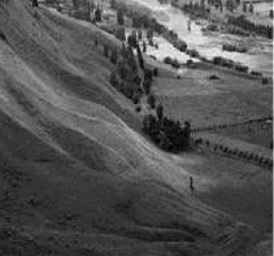

In [155]:
display(new_img)

## Task 1: part 2

In [156]:
im2=Image.open('lowcon.tif')

In [158]:
im2=im2.convert('L')

In [159]:
x=np.asarray(im2)

In [161]:
y=stretch(x.max(),x.min(),255,0,x)

In [162]:
new_im2=Image.fromarray(y)

In [163]:
new_im2=new_im2.convert('RGB')

### lowcon.tif before stretching

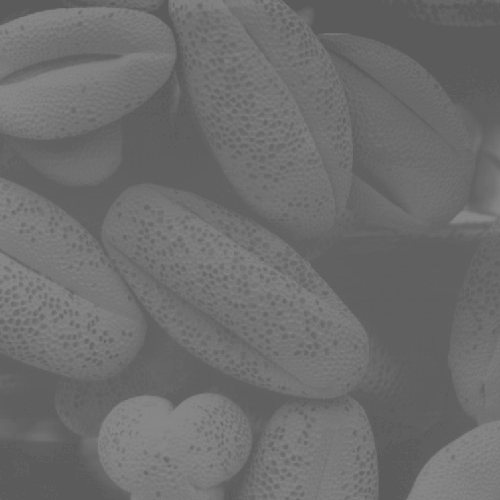

In [164]:
display(im2)

### lowcon.tif after stretching

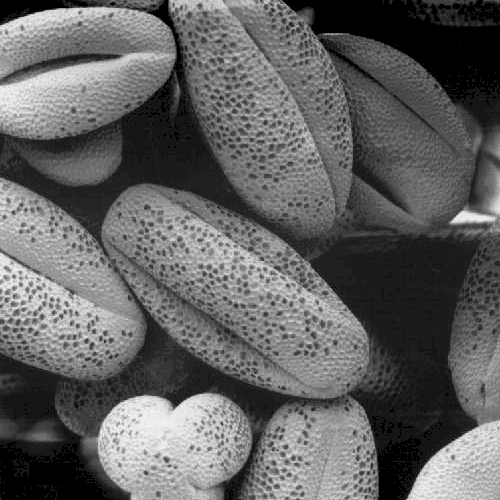

In [165]:
display(new_im2)

# Task 2: Applying Histogram Equalization

In [32]:
def cal_intensity_values(img):
    img_arr = np.asarray(img).copy()
    intensity_vals = np.zeros(256)
    
    for pixel in np.nditer(img_arr):
        intensity_vals[pixel] = intensity_vals[pixel] +1
    return intensity_vals


In [33]:
def plot_bargraph(intensity_arr, bins,title):
    plt.bar(range(bins),intensity_arr)
    # The following commands add labels to our figure.
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()


### Reading an Image

In [34]:
image = Image.open("wiki.jpg").convert("L")
img_arr = np.asarray(image, dtype=np.uint8)


### Apply Histogram Equalization technique using formula

In [35]:
intensity_vals = cal_intensity_values(image) # Calculate intensity frequency of given image
normalized_arr = intensity_vals / img_arr.size # Normalize by diving intensity frequency with image size
cdf = np.cumsum(normalized_arr) # calculate cumulative distribution function 
transformed_arr = np.round(cdf * 255 ) # Calculate Transformed array


In [36]:
img_arr_cp = img_arr.copy()

for x in range(len(img_arr)):
    for y in range(len(img_arr[x])):
        img_arr_cp[x][y] = transformed_arr[img_arr_cp[x][y]]


### Histogram before equalization

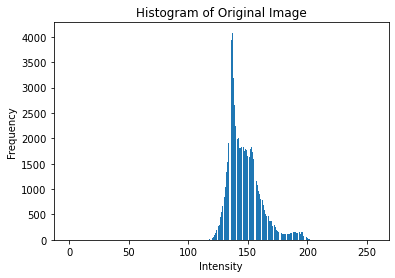

In [37]:
plot_bargraph(intensity_vals, 256,'Histogram of Original Image')

### Histogram after equalization

In [38]:
equalized_img=Image.fromarray(img_arr_cp)

In [39]:
intensity_vals = cal_intensity_values(equalized_img)

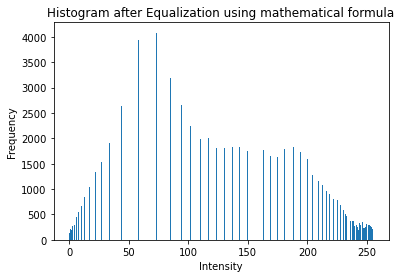

In [48]:
plot_bargraph(intensity_vals, 256,"Histogram after Equalization using mathematical formula") 

### Original Image

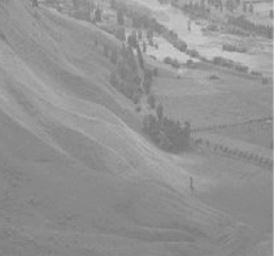

In [41]:
image

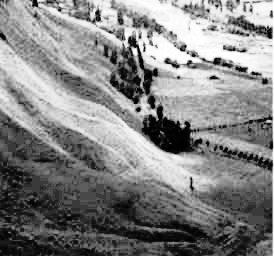

In [42]:
equalized_img

# 	OpenCV’s implementation of Histogram Equalization

In [43]:
import cv2 as cv

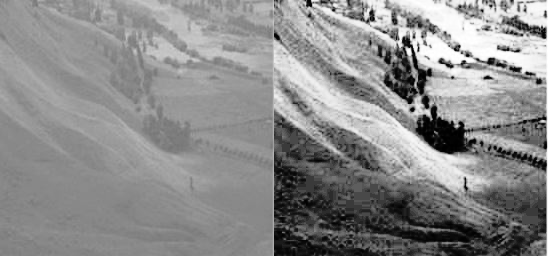

In [44]:
img = cv.imread('wiki.jpg',0)
equ = cv.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
display(Image.fromarray(res))

### Histogram after opencv Equalization

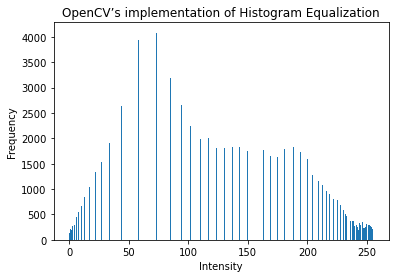

In [50]:
intensity_vals = cal_intensity_values(Image.fromarray(equ))
plot_bargraph(intensity_vals, 256,"OpenCV’s implementation of Histogram Equalization") 

### Histogram after formula equalization

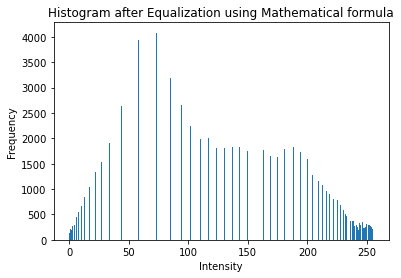

In [51]:
intensity_vals = cal_intensity_values(Image.fromarray(img_arr_cp))
plot_bargraph(intensity_vals, 256,"Histogram after Equalization using Mathematical formula") 

## Putting all the steps in a single function


In [57]:
def equalize(im):
    image = Image.open(im).convert("L")
    img_arr = np.asarray(image, dtype=np.uint8)
    
    intensity_vals = cal_intensity_values(image) # Calculate intensity frequency of given image
    normalized_arr = intensity_vals / img_arr.size # Normalize by diving intensity frequency with image size
    cdf = np.cumsum(normalized_arr) # calculate cumulative distribution function 
    transformed_arr = np.round(cdf * 255 ) # Calculate Transformed array
    
    img_arr_cp = img_arr.copy()

    for x in range(len(img_arr)):
        for y in range(len(img_arr[x])):
            img_arr_cp[x][y] = transformed_arr[img_arr_cp[x][y]]
            
    plot_bargraph(intensity_vals, 256,'Histogram of Original Image')
    
    equalized_img=Image.fromarray(img_arr_cp)
    intensity_vals = cal_intensity_values(equalized_img)
    plot_bargraph(intensity_vals, 256,"Histogram after Equalization using mathematical formula") 
    
    img = cv.imread(im,0)
    equ = cv.equalizeHist(img)
    res = np.hstack((img,equ))
    
    intensity_vals = cal_intensity_values(Image.fromarray(equ))
    plot_bargraph(intensity_vals, 256,"OpenCV’s implementation of Histogram Equalization") 
    
    res=np.hstack((img_arr,equalized_img,equ))
    display(Image.fromarray(res))
       

# Dark.tif

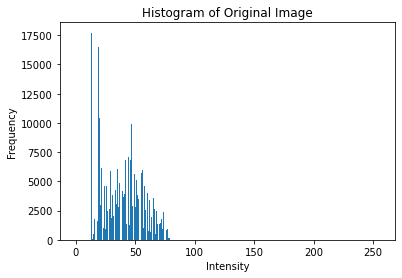

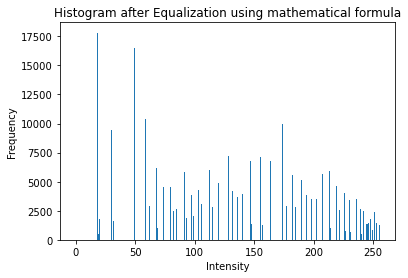

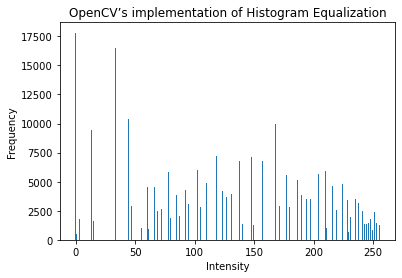

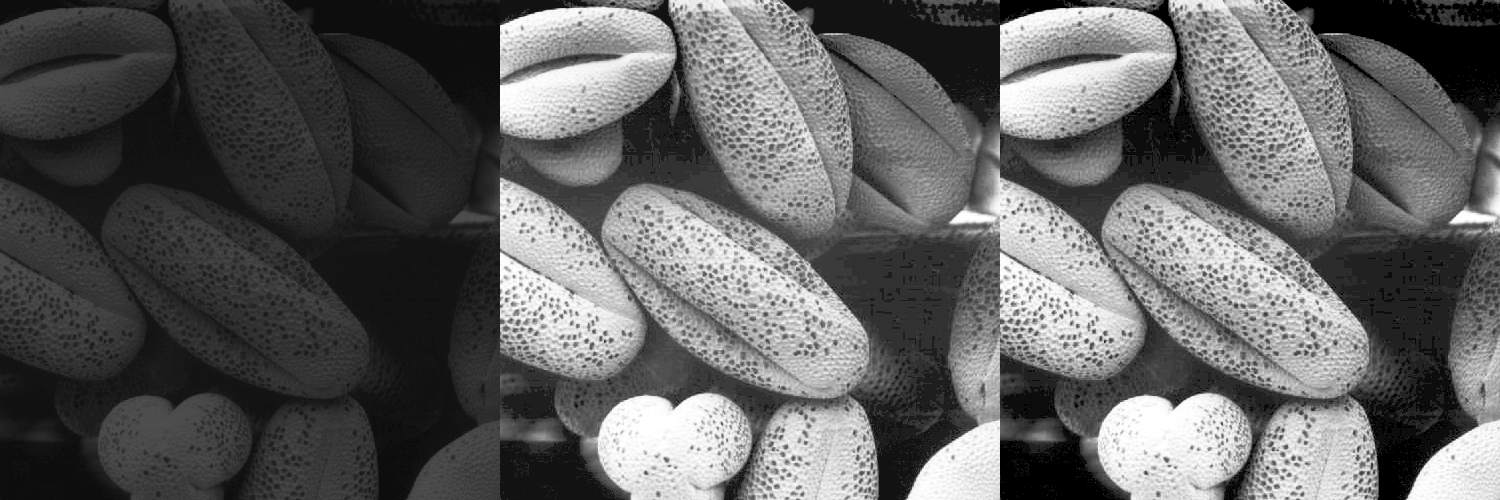

In [59]:
equalize('dark.tif')

# Bright.tif

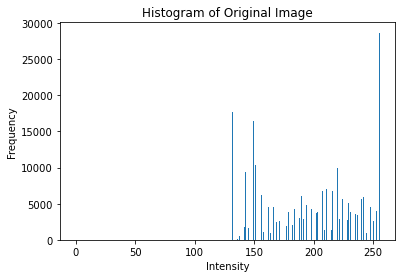

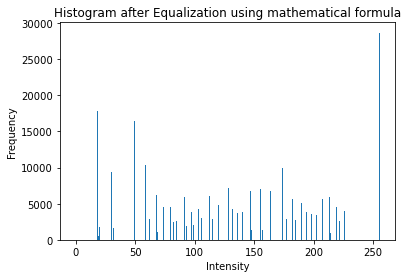

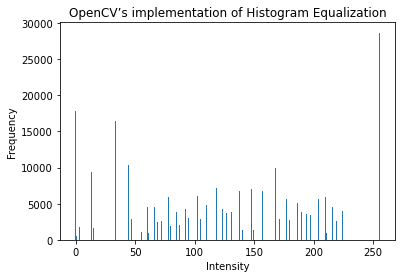

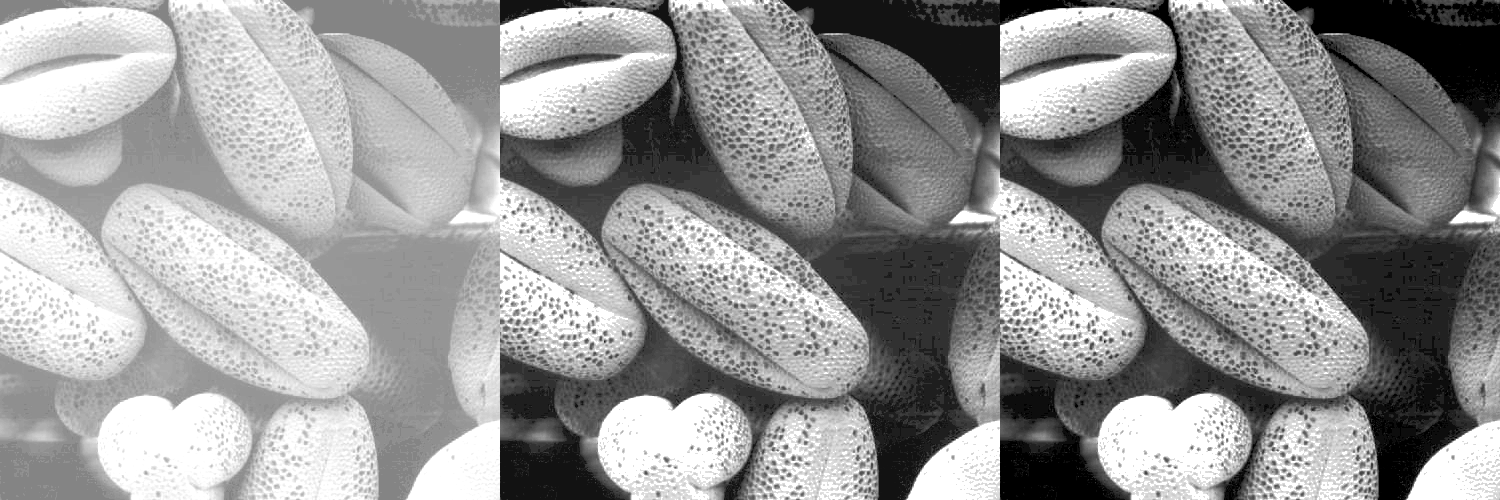

In [61]:
equalize('bright.tif')

# Lowcon.tif

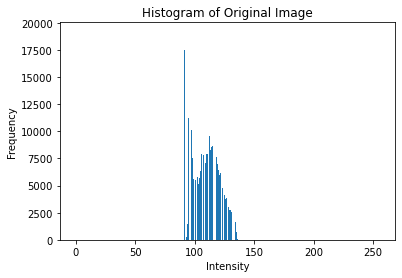

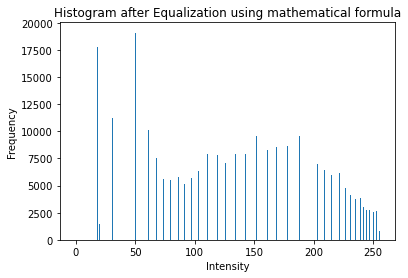

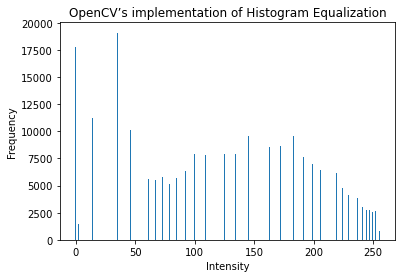

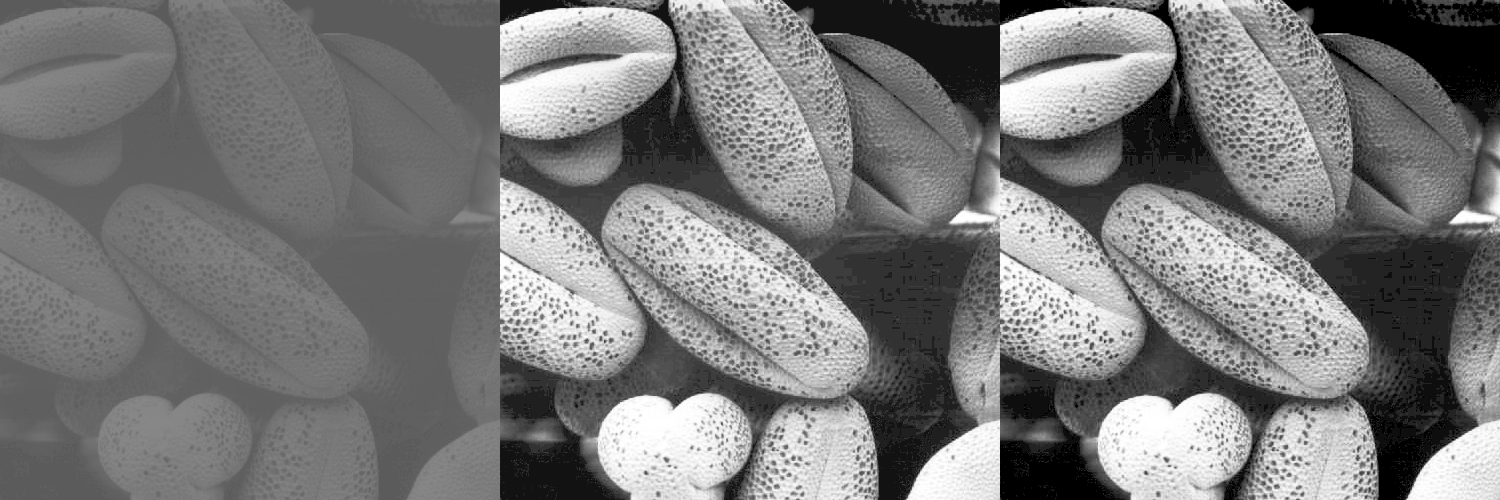

In [63]:
equalize('lowcon.tif')

# Wiki.jpg

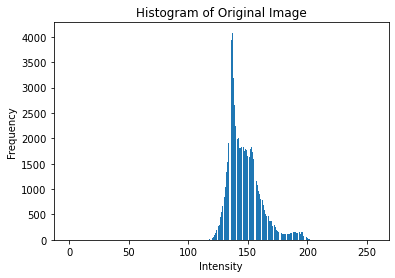

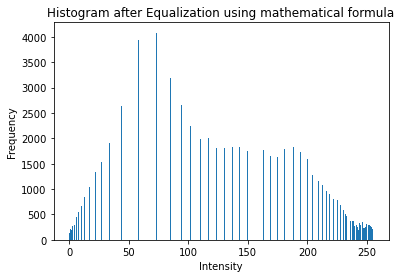

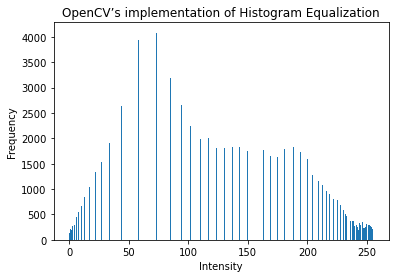

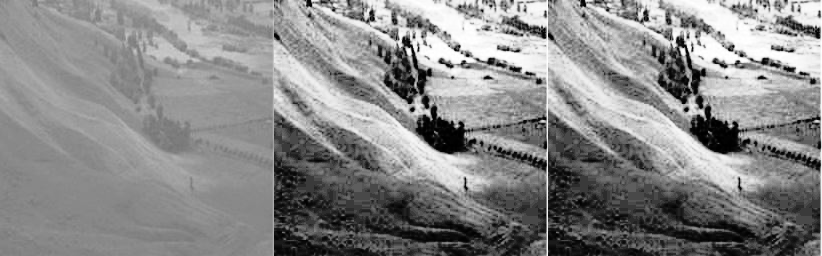

In [64]:
equalize('wiki.jpg')